# Lab 1: Cats vs Dogs Augmentation

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-10-13 03:59:24--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c0b::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   180MB/s    in 0.4s    

2023-10-13 03:59:24 (180 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile
import os

zip_local = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')
zip_ref.extractall()

training_dir = 'cats_and_dogs_filtered/train'
training_cats_dir = os.path.join(training_dir, 'cats')
training_dogs_dir = os.path.join(training_dir, 'dogs')

validation_dir = 'cats_and_dogs_filtered/validation'
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#### pake feature ImageGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode='binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### karena datanya training yg digenerate banyak hasil dari processing image oleh ImageDataGenerator sehingga banyak layer model pun perlu ditambah

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=2)

Epoch 1/20
100/100 - 27s - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6847 - val_accuracy: 0.6020 - 27s/epoch - 274ms/step
Epoch 2/20
100/100 - 16s - loss: 0.6850 - accuracy: 0.5465 - val_loss: 0.6798 - val_accuracy: 0.5570 - 16s/epoch - 156ms/step
Epoch 3/20
100/100 - 16s - loss: 0.6715 - accuracy: 0.5835 - val_loss: 0.6846 - val_accuracy: 0.5560 - 16s/epoch - 161ms/step
Epoch 4/20
100/100 - 15s - loss: 0.6647 - accuracy: 0.5855 - val_loss: 0.6457 - val_accuracy: 0.5920 - 15s/epoch - 151ms/step
Epoch 5/20
100/100 - 15s - loss: 0.6531 - accuracy: 0.5980 - val_loss: 0.6195 - val_accuracy: 0.6480 - 15s/epoch - 151ms/step
Epoch 6/20
100/100 - 15s - loss: 0.6302 - accuracy: 0.6455 - val_loss: 0.6418 - val_accuracy: 0.5900 - 15s/epoch - 149ms/step
Epoch 7/20
100/100 - 15s - loss: 0.6225 - accuracy: 0.6460 - val_loss: 0.5974 - val_accuracy: 0.6740 - 15s/epoch - 152ms/step
Epoch 8/20
100/100 - 15s - loss: 0.6135 - accuracy: 0.6550 - val_loss: 0.5903 - val_accuracy: 0.6930 - 15s/epoch - 149

In [9]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

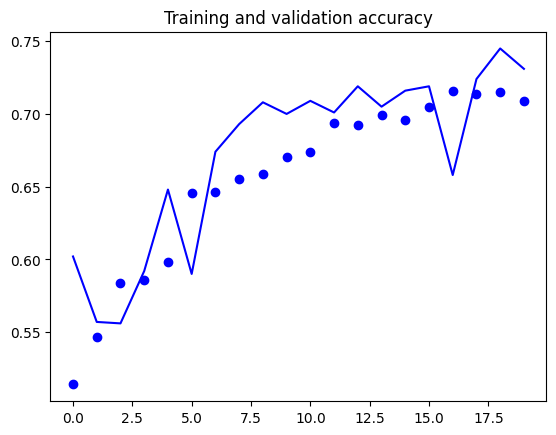

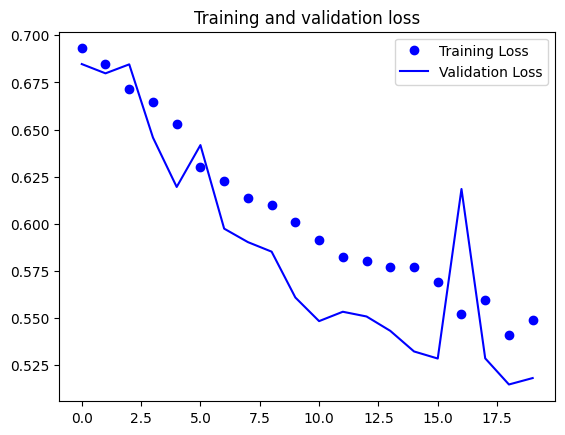

In [ ]:
# Plot training results
plot_loss_acc(history)

###berkat image augmentation, bisa selaras antara training sama validation. walaupun akurasi tidak terlalu tinggi hanya sekitar 70%. Plot tersebut menunjukkan image augmentation pada dataset catsVdogs berhasil.

# Data Augmentation on the Horses or Humans Dataset

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-10-14 02:28:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  27.7MB/s    in 6.1s    

2023-10-14 02:29:00 (23.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-10-14 02:29:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  9.17MB/s    in 1.2s    

2023-10-14 02:29:01 (9.17 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import zipfile

zip_local = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')
zip_ref.extractall('/horse-or-human')

zip_local = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')
zip_ref.extractall('/validation-horse-or-human')

In [4]:
import os

train_dir = '/horse-or-human'
train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')

validation_dir = '/validation-horse-or-human'
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(300,300)
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(300,300)
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


##### karna data lebih sedikit jadi jumlah epoch, steps_per_epoch perlu disesuaikan

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history_data2 = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=8,
                    validation_data=validation_generator,
                    validation_steps=8,
                    verbose=2)

Epoch 1/20
8/8 - 9s - loss: 0.6975 - accuracy: 0.5188 - val_loss: 0.6945 - val_accuracy: 0.5063 - 9s/epoch - 1s/step
Epoch 2/20
8/8 - 5s - loss: 0.6965 - accuracy: 0.5102 - val_loss: 0.7087 - val_accuracy: 0.4875 - 5s/epoch - 622ms/step
Epoch 3/20
8/8 - 6s - loss: 0.6711 - accuracy: 0.5688 - val_loss: 0.6896 - val_accuracy: 0.5125 - 6s/epoch - 763ms/step
Epoch 4/20
8/8 - 5s - loss: 0.6704 - accuracy: 0.6000 - val_loss: 0.6735 - val_accuracy: 0.4875 - 5s/epoch - 607ms/step
Epoch 5/20
8/8 - 6s - loss: 0.6395 - accuracy: 0.6687 - val_loss: 0.6530 - val_accuracy: 0.7000 - 6s/epoch - 743ms/step
Epoch 6/20
8/8 - 5s - loss: 0.6276 - accuracy: 0.6687 - val_loss: 0.6622 - val_accuracy: 0.5188 - 5s/epoch - 639ms/step
Epoch 7/20
8/8 - 5s - loss: 0.6116 - accuracy: 0.6562 - val_loss: 0.6412 - val_accuracy: 0.5625 - 5s/epoch - 614ms/step
Epoch 8/20
8/8 - 6s - loss: 0.5629 - accuracy: 0.7563 - val_loss: 1.0532 - val_accuracy: 0.4938 - 6s/epoch - 795ms/step
Epoch 9/20
8/8 - 6s - loss: 0.6395 - accura

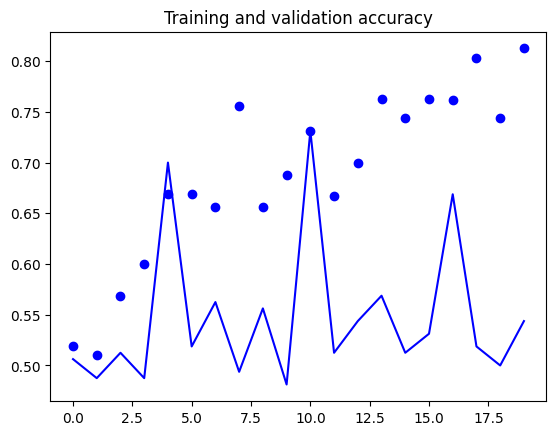

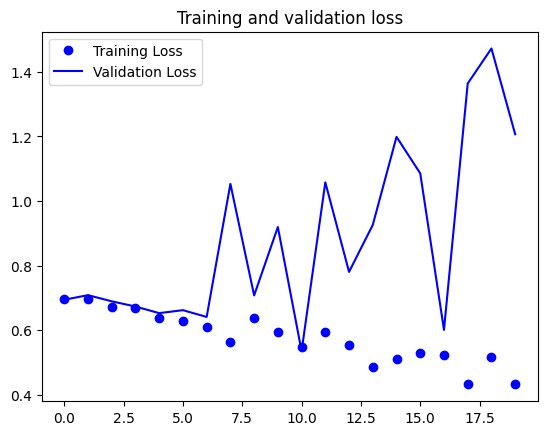

In [16]:
# Plot training results
plot_loss_acc(history_data2)

#### The results above show that augmentation doesn't  always work in all cases. It depends on the dataset. ImageDataGenerator doesn't work on horse-or-human dataset because the added featured image stil doesn't represent validation data and confuse the model and pattern